# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns
import scipy


In [2]:
path = r'/Users/sarahedens/Desktop/Instacart Basket Analysis'

In [3]:
df_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customers_merged.pkl'))

# 2. Create bar chart, histogram, scatterplot, and line chart (using sample subset).

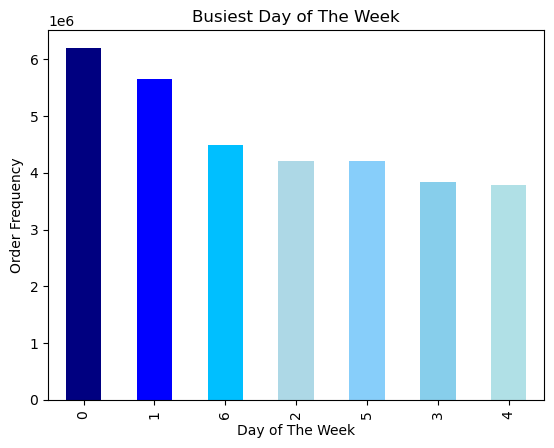

In [4]:
# Create a bar chart with different shades of blue
bar = df_all['orders_day_of_week'].value_counts().plot.bar(
    title='Busiest Day of The Week',
    xlabel='Day of The Week',
    ylabel='Order Frequency',
    color=['navy', 'blue', 'deepskyblue', 'lightblue', 'lightskyblue', 'skyblue', 'powderblue']
)


In [5]:
# export it. outside of juypter in the form of an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [6]:
df_all['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [7]:
# Calculate statistics
mean_price = 7.80
std_price = 4.24

# Define price range thresholds
lower_bound = mean_price - std_price
upper_bound = mean_price + std_price

# Categorize prices into three ranges
df_all['price_range'] = pd.cut(df_all['prices'], bins=[-float('inf'), lower_bound, upper_bound, float('inf')],
                           labels=['Low', 'Medium', 'High'], include_lowest=True)

# Display the updated DataFrame
print(df_all)

          product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id  order_number  orders_day_of_week  \
0 

In [8]:
df_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,_merge,price_range
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Medium
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Medium
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,High


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Low')])

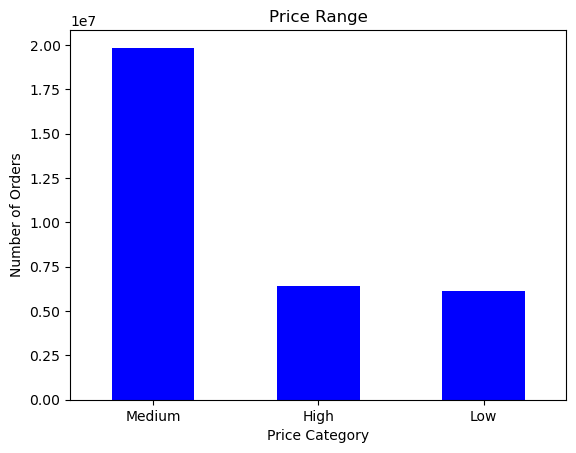

In [9]:
bar_price_range = df_all['price_range'].value_counts(dropna = True).plot.bar(title = 'Price Range', xlabel = 'Price Category', ylabel = 'Number of Orders', color = 'blue')
plt.xticks(rotation=0)

In [10]:
#saving as png
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

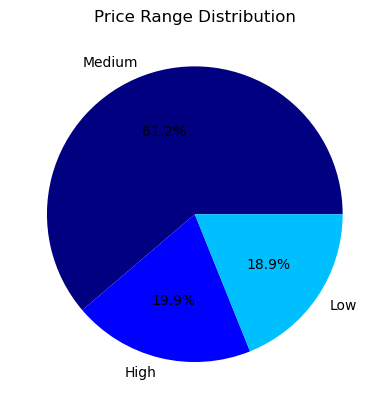

In [13]:
import matplotlib.pyplot as plt
import os

# Define different shades of blue
blue_shades = ['navy', 'blue', 'deepskyblue', 'lightblue', 'lightskyblue', 'skyblue', 'powderblue']

# Get the price range counts
price_range_counts = df_all['price_range'].value_counts(dropna=True)

# Plotting pie chart
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=blue_shades)

# Adding title
plt.title('Price Range Distribution')

# Save the pie chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range_blue.png'))

# Display the pie chart
plt.show()


<Axes: ylabel='Frequency'>

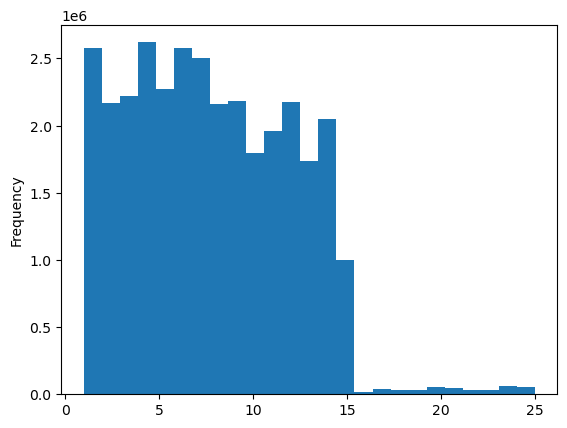

In [14]:
# Create Histograms and Scatterplots
df_all['prices'].plot.hist(bins = 25)

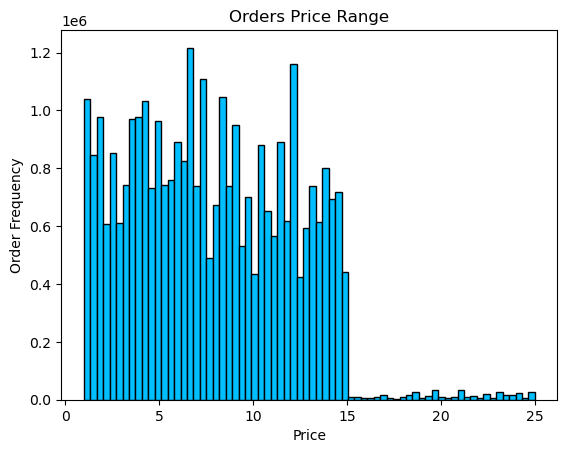

In [15]:
# increase level of granularity in the histogram - bin 70
hist_2 = df_all['prices'].plot.hist(bins = 70, title = 'Orders Price Range', xlabel = 'Price', ylabel = 'Order Frequency', color = 'deepskyblue', edgecolor = 'black')

In [16]:
# export hist_2 outside of juypter in the form of an image file
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [17]:
## Creating line Charts
# Sampling (randomized) Data
# 1. Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_all)) <=0.7

In [18]:
# Store 70% of the sample in the dataframe big
big = df_all[dev]

In [19]:
# Store 30% of the sample in the dataframe small
small = df_all[~dev]

In [20]:
# Check if big and small adds up to the df_all length (number of rows)
len(df_all)

32404859

In [21]:
len(big)+len(small)

32404859

In [22]:
df_2 = small[['orders_day_of_week','prices']]

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Price')

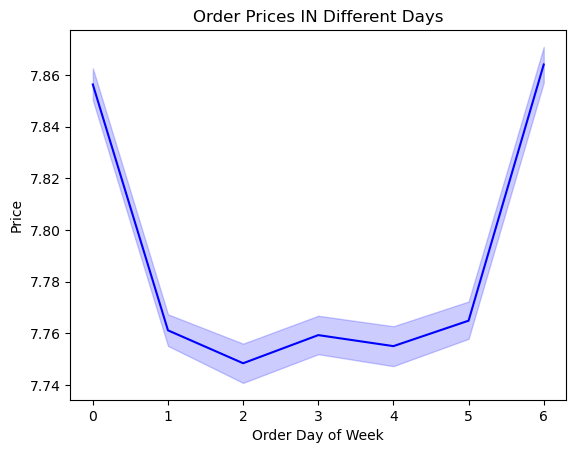

In [24]:
line_odw = sns.lineplot(data = df_2,x = 'orders_day_of_week', y = 'prices', color = 'blue')
plt.title('Order Prices IN Different Days')
plt.xlabel('Order Day of Week')
plt.ylabel('Price')

In [25]:
# export as an image file
line_odw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_odw.png'))

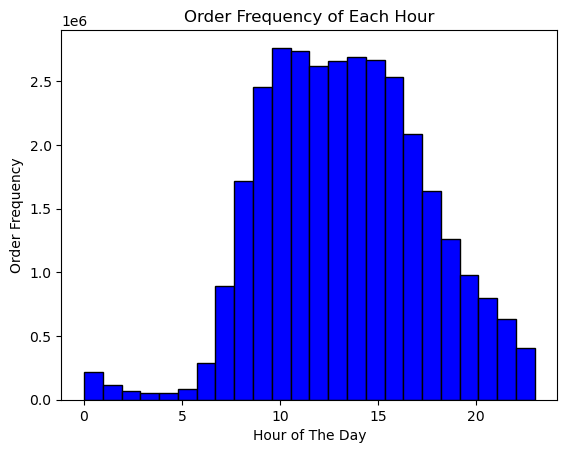

In [27]:
# Create Histograms and Scatterplots
hist_tod = df_all['order_hour_of_day'].plot.hist(bins = 24, title = 'Order Frequency of Each Hour', xlabel = 'Hour of The Day', ylabel = 'Order Frequency' , color='blue', edgecolor ='black')

According to the histogram, it seems that the peak hours for purchases are around 10 am in the morning. Most transactions occur between 9 am and 4 pm, indicating high shopping activity during these hours. Conversely, the least frequent purchases happen during the early morning, particularly between 12 am and 5 am. This indicates a quiet period for transactions during the late night and early morning hours.

In [28]:
# export as an image file
hist_tod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_tod.png'))

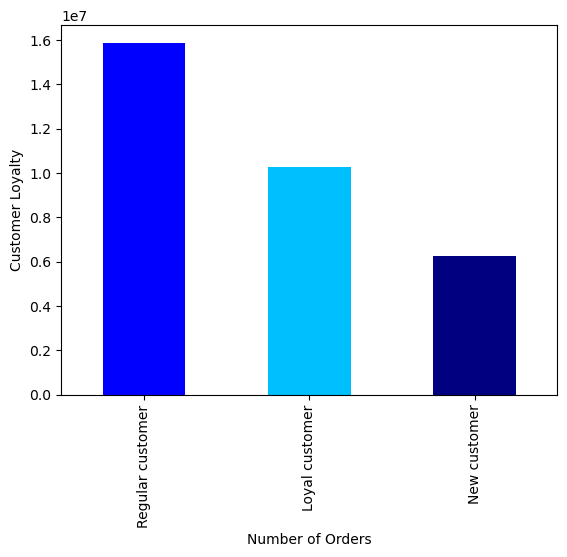

In [33]:
# Create bar chart
bar_loyalty = df_all['loyalty_flag'].value_counts().plot.bar(xlabel='Number of Orders', ylabel= 'Customer Loyalty', color = ['blue','deepskyblue','navy'])


In [34]:
# export as an image file
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# Create line graph to check difference in expenditure depending on hour of day

In [35]:
df_expenditure = small[['order_hour_of_day','prices']]

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0, 0.5, 'Price')

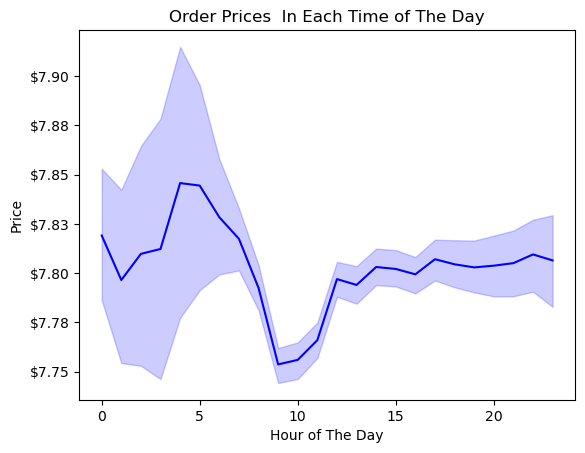

In [41]:
line_expenditure = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day', y = 'prices', color = 'blue')
line_expenditure.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:.2f}'))
plt.title('Order Prices  In Each Time of The Day')
plt.xlabel('Hour of The Day')
plt.ylabel('Price')

In [42]:
# export as an image file
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

# Exploratory Analysis of customer demgraphics - Create a line chart exploring the connections between age and dependents

In [43]:
df_demographics = small[['Age','dependants']]

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

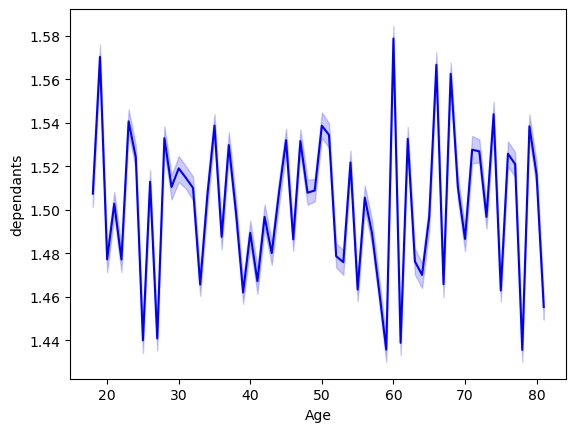

In [44]:
line_demographics = sns.lineplot(data = df_demographics, x = 'Age', y = 'dependants', color = 'blue')

In [45]:
# group the values into categorical Age Brackets
df_demographics['Age_Bracket'] = pd.cut(df_demographics['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43458/1692962681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographics['Age_Bracket'] = pd.cut(df_demographics['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


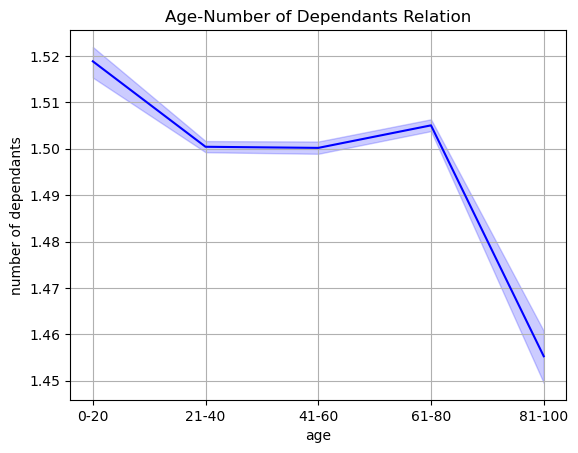

In [50]:
line_demographics_2 = sns.lineplot(data=df_demographics, x='Age_Bracket', y='dependants', color='blue')
line_demographics_2.set(xlabel='age', ylabel='number of dependants')
plt.title('Age-Number of Dependants Relation')
plt.grid()

In [47]:
# export as an image file
line_demographics_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_demographics.png'))

# Analysis conncection between age and income by creating a Scatterplot

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


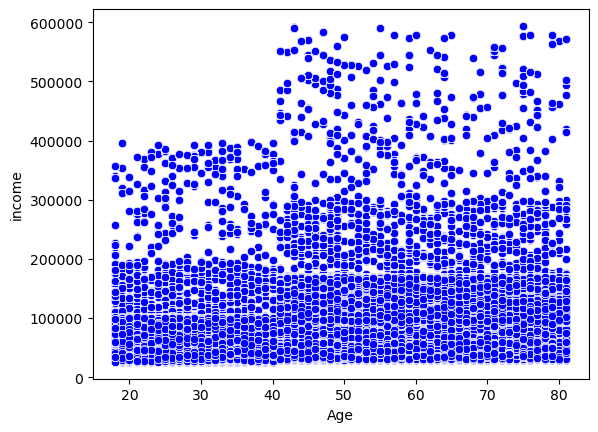

In [51]:
plot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = small, color = 'blue')

In [55]:
# group the values into categorical Age Brackets
small['Age_Bracket'] = pd.cut(small['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43458/771792558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['Age_Bracket'] = pd.cut(small['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])


/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

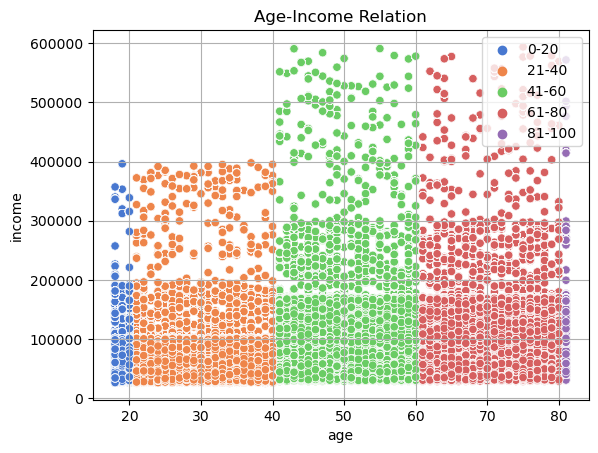

In [59]:
plot_age_income_2 = sns.scatterplot(x='Age', y='income', data=small, hue='Age_Bracket', palette='muted')
plot_age_income_2.legend(loc='upper right')
plt.grid()
plt.title('Age-Income Relation')
plot_age_income_2.set(xlabel='age', ylabel='income')

In [60]:
# export plot_age_income as an image file
plot_age_income_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'plot_age_income.png'))

In [61]:
# exporting small randomized sampling data
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_sample.pkl'))